In [2]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn import preprocessing

In [3]:
csv = 'Crash_Data.csv'
my_df = pd.read_csv(csv)
my_df.head()


,Crash ID,Date,Day of Week,Time,Lane Count,Crash Type,Functional Class,Speed Limit,Environmental Conditions,Light Conditions,...,Total Vehicles Involved,Curve Related,Alcohol Involved,Distracted Driving Involved,Drugged Driver Involved,Older Driver Involved,Temp Traffic Control Zone,Traffic Controls Present,Vehicle Type,Severity
0,9969918,4,1,2,3,3,2,4,1,4,...,2,2,2,2,2,1,1,1,1,3
1,9741036,4,1,1,3,1,2,4,1,4,...,2,1,2,1,2,2,1,1,1,3
2,9965952,4,1,1,3,1,2,4,1,3,...,2,2,2,1,2,3,1,1,1,3
3,9705367,4,1,1,2,3,2,1,2,2,...,2,2,2,2,2,2,1,1,3,3
4,9741034,4,2,1,3,3,2,4,2,4,...,2,2,2,2,2,2,1,1,1,3


In [5]:
my_df['Severity'].isnull().sum()
len(my_df['Severity'])

8232

In [6]:
#Frequency distribution of classes"
train_outcome = pd.crosstab(index=my_df["Severity"],  # Make a crosstab
                              columns="count")      # Name the count column

train_outcome

col_0,count
Severity,
1,13
2,254
3,7965


In [7]:
X = my_df.iloc[:,1:-1].values
y = my_df.iloc[:,20].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
#Frequency distribution of classes"
y_train_outcome = pd.crosstab(index=y_train,  # Make a crosstab
                              columns="count")      # Name the count column

y_train_outcome

col_0,count
row_0,
1,9
2,200
3,6376


In [10]:
from sklearn.preprocessing import StandardScaler
scaler_train = StandardScaler()
scaler_train.fit(X_train)
X_train = scaler_train.transform(X_train)
# print(X_train)
X_test = scaler_train.transform(X_test)
# print(X_test)

print(len(X_train),len(X_test),len(y_train),len(y_test))

6585 1647 6585 1647


In [11]:
#this is the answer for 'c' from the task one.
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
accuracy_without_validation = []
for i in range(1,10,2):
  classifier = KNeighborsClassifier(n_neighbors=i)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy_without_validation.append(metrics.accuracy_score(y_test, y_pred))
  print("Accuracy for the value of k =",i ," is ",metrics.accuracy_score(y_test, y_pred))

Accuracy for the value of k = 1  is  0.9398907103825137
Accuracy for the value of k = 3  is  0.9599271402550091
Accuracy for the value of k = 5  is  0.9641772920461446
Accuracy for the value of k = 7  is  0.9647844565877353
Accuracy for the value of k = 9  is  0.9647844565877353


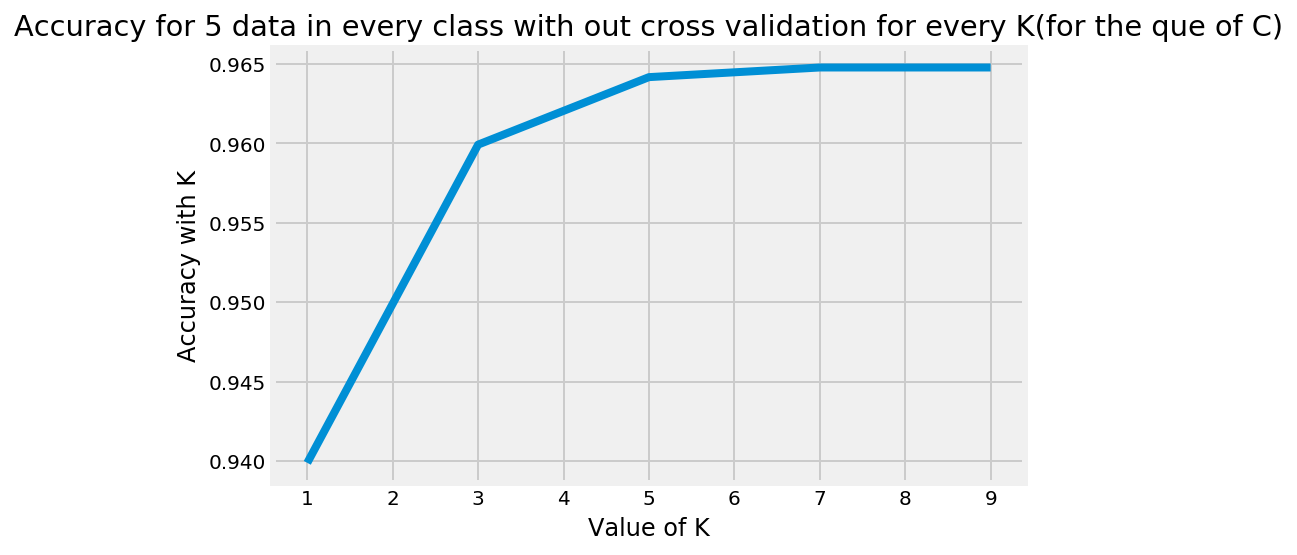

In [12]:
from sklearn import metrics
plt.plot(range(1,10,2), accuracy_without_validation)
plt.xlabel('Value of K')
plt.ylabel('Accuracy with K')
plt.title('Accuracy for 5 data in every class with out cross validation for every K(for the que of C)')
plt.show()

In [13]:
print(type(X_train),len(X_test),len(y_train),len(y_test))


<class 'numpy.ndarray'> 1647 6585 1647


In [14]:
#this is the answer of 'b' from the task one..
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
X_total = X_train
y_total = y_train
# print(X_total.shape,y_train.shape,y_test.shape,y_total.shape)
result_with_k = []
for i in range(1,10,2):
  accuracy =0
  for train, test in loo.split(X_total):
    X_train_new , X_test_new = X_total[train],X_total[test]
    y_train_new , y_test_new = y_total[train],y_total[test]
    # print(X_train_new.shape,X_test_new.shape, y_train_new.shape,y_test_new.shape)
    classifier_new = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train_new, y_train_new)
    y_pred_new = classifier.predict(X_test_new)
    result = metrics.accuracy_score(y_test_new, y_pred_new)
    accuracy+=result
  result_with_k.append(accuracy/len(X_total))
  print("Accuracy for k = ",i,"is = ",accuracy/len(X_total))

Accuracy for k =  1 is =  0.9681093394077449
Accuracy for k =  3 is =  0.9681093394077449
Accuracy for k =  5 is =  0.9681093394077449
Accuracy for k =  7 is =  0.9681093394077449
Accuracy for k =  9 is =  0.9681093394077449


# So we can say if we use cross validation the impact of k is equal.....


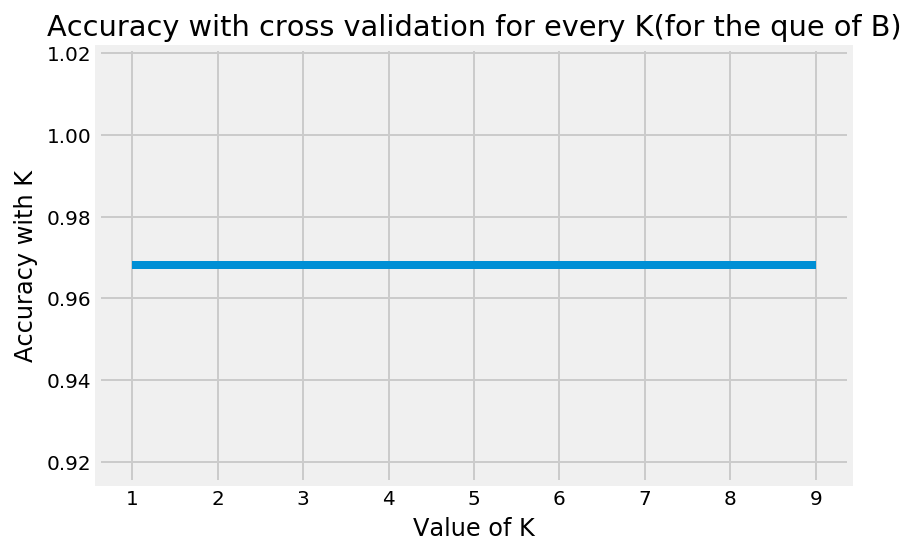

In [15]:
from sklearn import metrics

plt.plot(range(1,10,2), result_with_k)
plt.xlabel('Value of K')
plt.ylabel('Accuracy with K')
plt.title('Accuracy with cross validation for every K(for the que of B)')
plt.show()

# Based on LOOCV performance evaluation in (b), which k performs the best? Does it correspond to the testing error?
No it doesn't correspond to the testing error.as it remains constant accuracy..


# And the last que's ans is when we use cross validation every K can give us the same accuracy and with out cross validation only with the 5 data of every calss the accuracy has differneces..as we know the elbow method the most reliable k is 5 and we have the same here..have max accuracy for k =5